In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial
from itertools import cycle
import os

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints
from wilson_cowan_2d.utils import make_counter

from IPython.display import HTML, clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
report_path = "/home/nicolasjudd/school_notes/neural/final_report/"
img_path = os.path.join(report_path, 'img')

In [4]:
# dots = ["⢀⠀","⡀⠀","⠄⠀","⢂⠀","⡂⠀","⠅⠀",
# "⢃⠀","⡃⠀","⠍⠀","⢋⠀","⡋⠀","⠍⠁","⢋⠁","⡋⠁","⠍⠉","⠋⠉",
# "⠋⠉","⠉⠙","⠉⠙","⠉⠩","⠈⢙","⠈⡙","⢈⠩","⡀⢙","⠄⡙",
# "⢂⠩","⡂⢘","⠅⡘","⢃⠨","⡃⢐","⠍⡐","⢋⠠","⡋⢀","⠍⡁",
# "⢋⠁","⡋⠁","⠍⠉","⠋⠉","⠋⠉","⠉⠙","⠉⠙","⠉⠩","⠈⢙",
# "⠈⡙","⠈⠩","⠀⢙","⠀⡙","⠀⠩","⠀⢘","⠀⡘","⠀⠨","⠀⢐",
# "⠀⡐","⠀⠠","⠀⢀","⠀⡀"
# ]
# dot_cycle = cycle(dots)

In [5]:
# def make_counter(end, rate=20):
#     e = end
#     counter = 0
#     dot_cycle = cycle(dots)
#     def count_time(t):
#         nonlocal counter
#         counter += 1
#         if counter % rate == 0:
#             clear_output(wait=True)
#             print(next(dot_cycle), f"Time Step: {int(t):0>4}/{int(e):0>4}",
#                   f"Percent Done: {t/e:>.1%}")

#     return count_time
        

/home/nicolasjudd/school_notes/neural/py_projs/2D_wilson_cowan/src/wilson_cowan_2d/simulations/nonlinear_functions.py:11: RuntimeWarning: overflow encountered in exp


[[0.005      0.083      0.424     ]
 [0.00394725 0.00396604 0.20470882]]


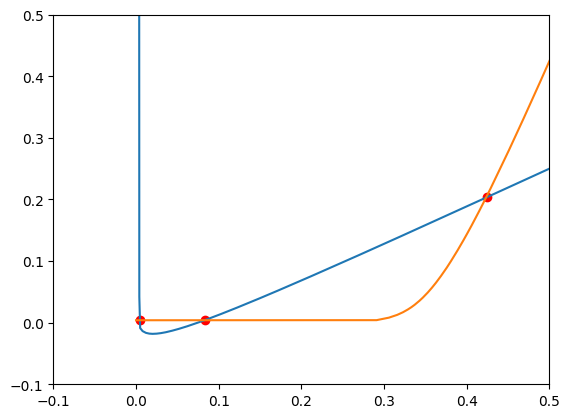

In [56]:
τ = 0.1
τe = 1
τi = τ * τe

σ = 0.9
σe = 10
σi = σ* σe

param = wcp.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**8+1, σ=np.array([σe,σi]))
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0


x,y = np.ogrid[-param.size/2:param.size/2, -param.size/2:param.size/2]

radius = 10
u = ((x + 0)**2 + (y + 0)**2 <= radius ** 2) * 0.75
# u[param.size//2-s:param.size//2+s, param.size//2-s:param.size//2+s] = 1
v = v_str*np.ones((param.size, param.size))

#  inp = (u3, v3, u3, 0)

inp = (u, v)

In [57]:
end = 30
step = end/(4*param.size)
count = make_counter(end, rate=5)
boundary='wrap'
# res = wck.WCDecExpTravelNonLocal2D(inp, param)((0, end), t_eval=np.arange(0, end, step))
res = wck.WCDecExpTravelNonLocal2D(inp, param)(
    (0, end), t_eval=np.arange(0, end, step), args=(count, boundary,))
# res = wck.WCDecExpTravelNonLocal2D(inp, param)((0, end), args=(count,))

print(res.message)

⢋⠁ Time Step: 0030/0030 Percent Done: 100.0%
The solver successfully reached the end of the integration interval.


In [58]:
u, v = res.y.T.reshape(2, len(res.t), param.size, param.size)

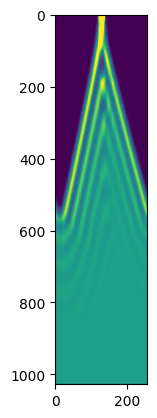

In [59]:
test_list = list(u)
plt.imshow(u[:, :, param.size//2], vmin=0, vmax=0.5)

⢈⠩ Time Step: 1027/1028 Percent Done: 99.9%


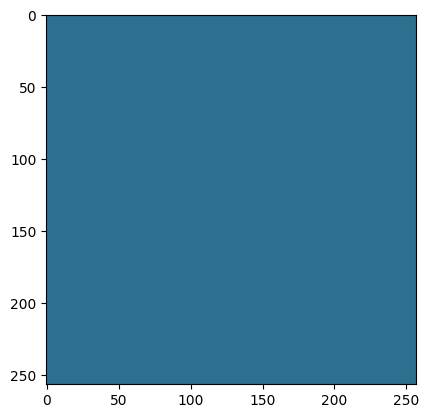

In [60]:
fig, ax = plt.subplots()
vmin=0
vmax=0.5

im1 = ax.imshow(test_list[0], vmin=vmin, vmax=vmax)
cnt = make_counter(len(test_list), rate=1, wait=False)

def update_gif(i, plot, ims):
    _ = plot.set_data(test_list[i])
    cnt(i)
    return plot,

anim = FuncAnimation(fig, partial(update_gif, plot=im1, ims=test_list)
                     ,frames=range(len(test_list)),interval=1000/120, blit=True)

HTML(anim.to_html5_video())

In [ ]:
# anim.save(os.path.join(img_path, f"Traveling_Pulse_512x512_sig--1.45_tau--2.gif"))

In [50]:
test = anim.to_html5_video()

with open(os.path.join(img_path, f"2d_traveling_pulse_sig={σ}_tau={τ}_boundary={boundary}"+".html"), 'w') as w:
    w.write(test)

494063